In [1]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [2]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal_supercategory.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal_supercategory.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal_supercategory.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal_supercategory.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
def compare_coefficients_and_importances_with_r2(
    linear_coefs_df,
    nonlinear_importances_df,
    linear_metrics_df,
    nonlinear_metrics_df,
    top_n=10
):
    results = []

    # Ensure index
    if 'Variable' in linear_coefs_df.columns:
        linear_coefs_df = linear_coefs_df.set_index('Variable')

    targets = nonlinear_importances_df['Target'].unique()

    for target in targets:
        if target not in linear_coefs_df.columns:
            continue

        # Coefficients
        coefs = linear_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index
        top_coef_values = coefs[top_coef_vars].values  # keep original signs

        # Importances
        imp_target = nonlinear_importances_df[nonlinear_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_linear_val = linear_metrics_df.loc[linear_metrics_df['Gasto'] == target, 'R2']
        r2_linear_str = f"{r2_linear_val.values[0]:.3f}" if not r2_linear_val.empty else "N/A"

        r2_nonlinear_val = nonlinear_metrics_df.loc[nonlinear_metrics_df['Target'] == target, 'R2']
        r2_nonlinear_str = f"{r2_nonlinear_val.values[0]:.3f}" if not r2_nonlinear_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Colors for coefficients: darkred if positive, darkblue if negative
        coef_colors = ['darkred' if v > 0 else 'darkblue' for v in top_coef_values]

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=coef_colors
        )
        axs[0].set_title(f'|Coef| - {target}\nR² linear = {r2_linear_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Absolute Coefficient Value')

        # Colors for importances: all black
        imp_colors = ['black'] * len(top_imp_vars)

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=imp_colors
        )
        axs[1].set_title(f'Importance - {target}\nR² nonlinear = {r2_nonlinear_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Model Importance')

        plt.suptitle(f'Comparison: Coefficients vs Importances - {target}', fontsize=14)
        plt.tight_layout()
        results.append(fig)

    return results


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>]

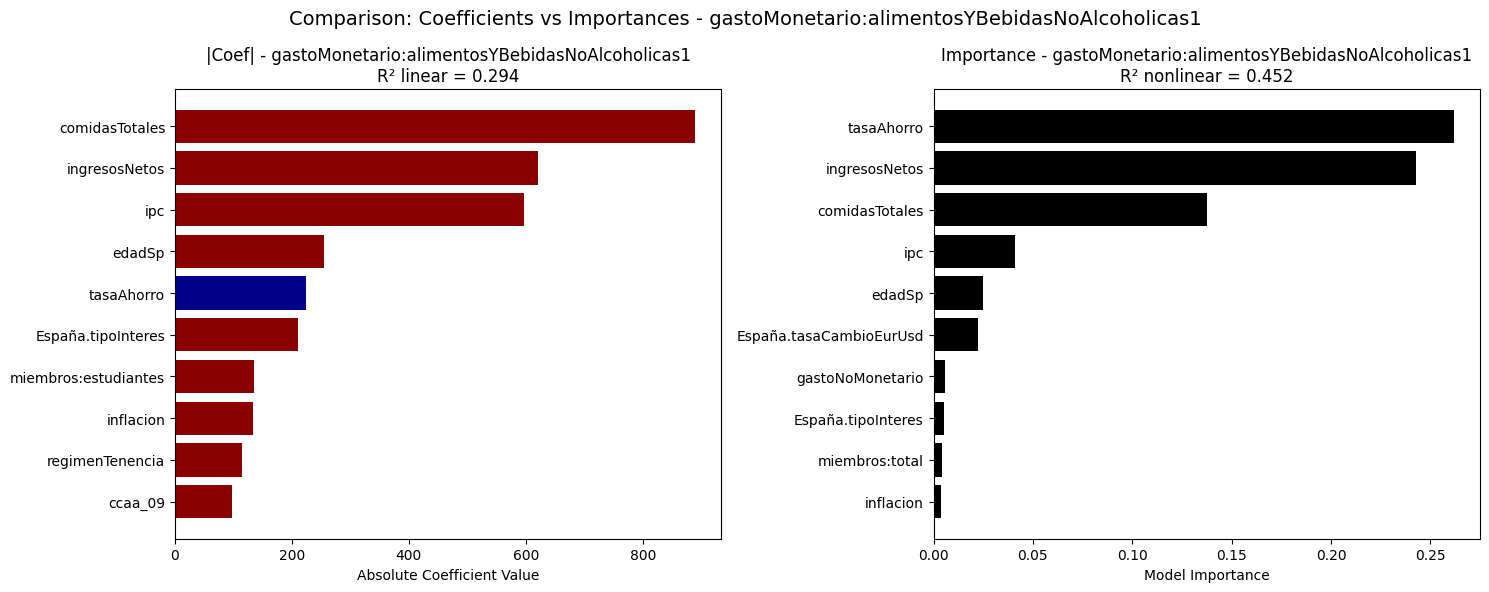

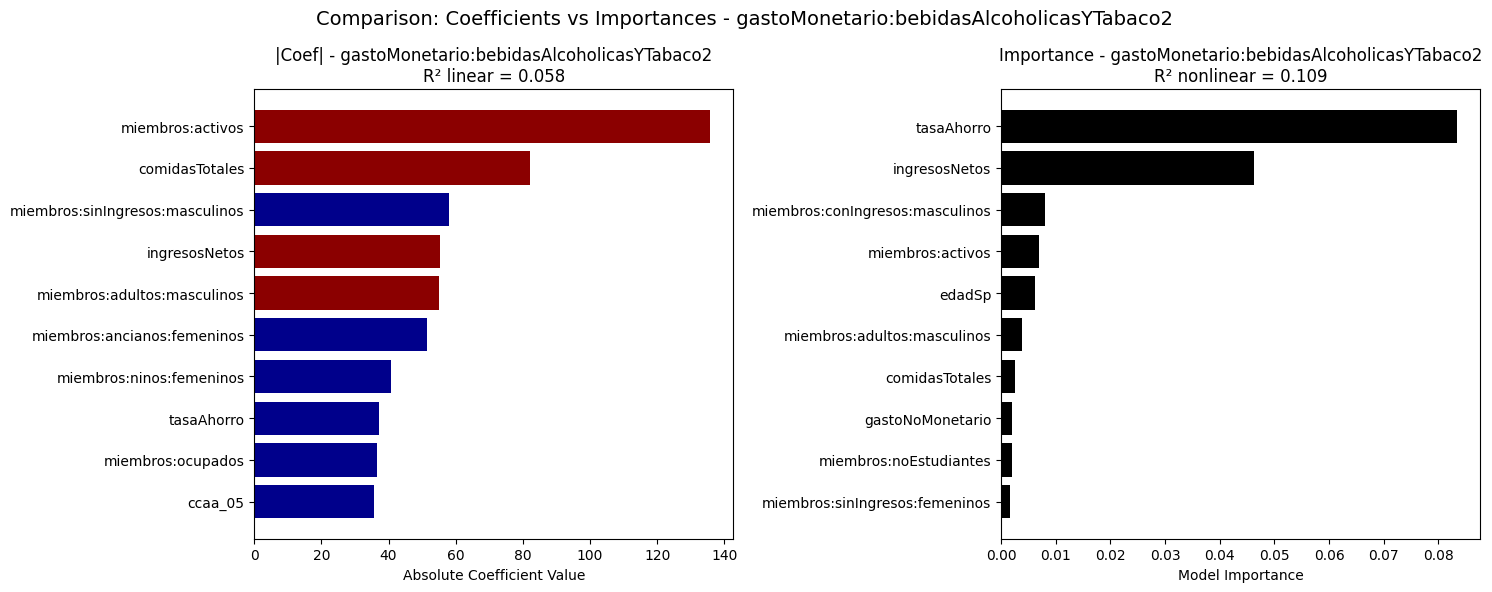

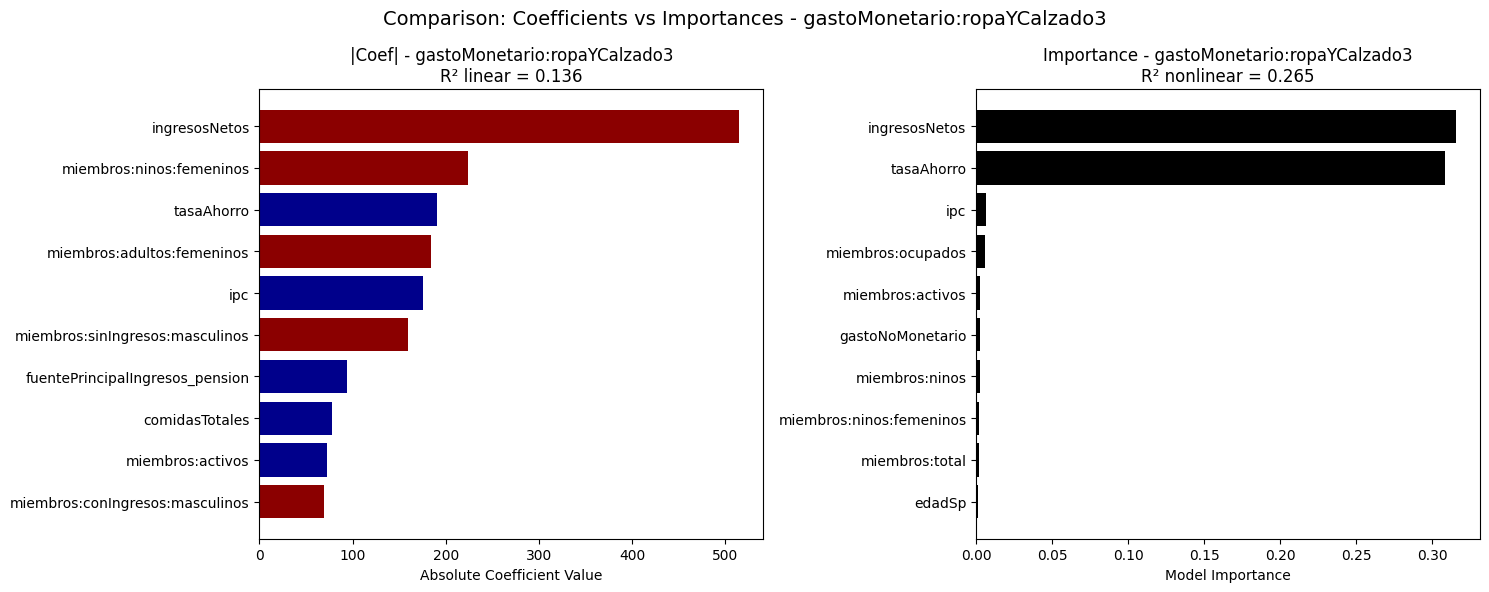

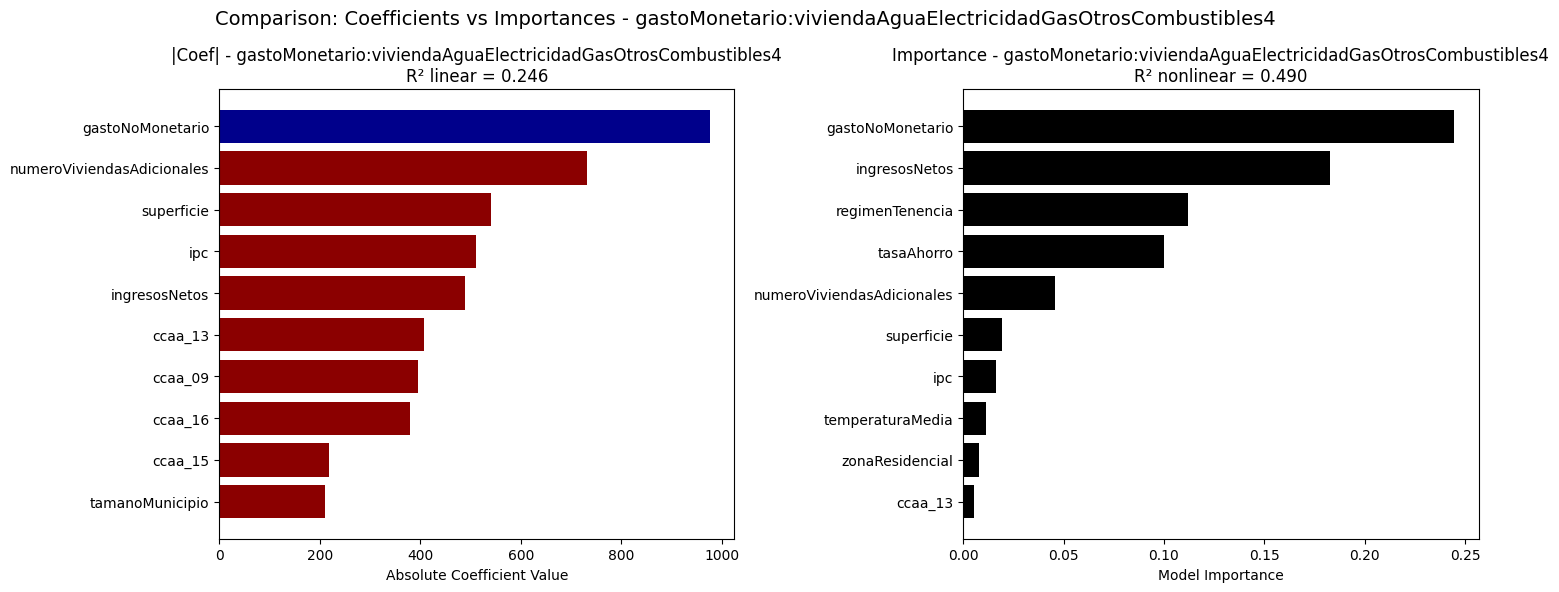

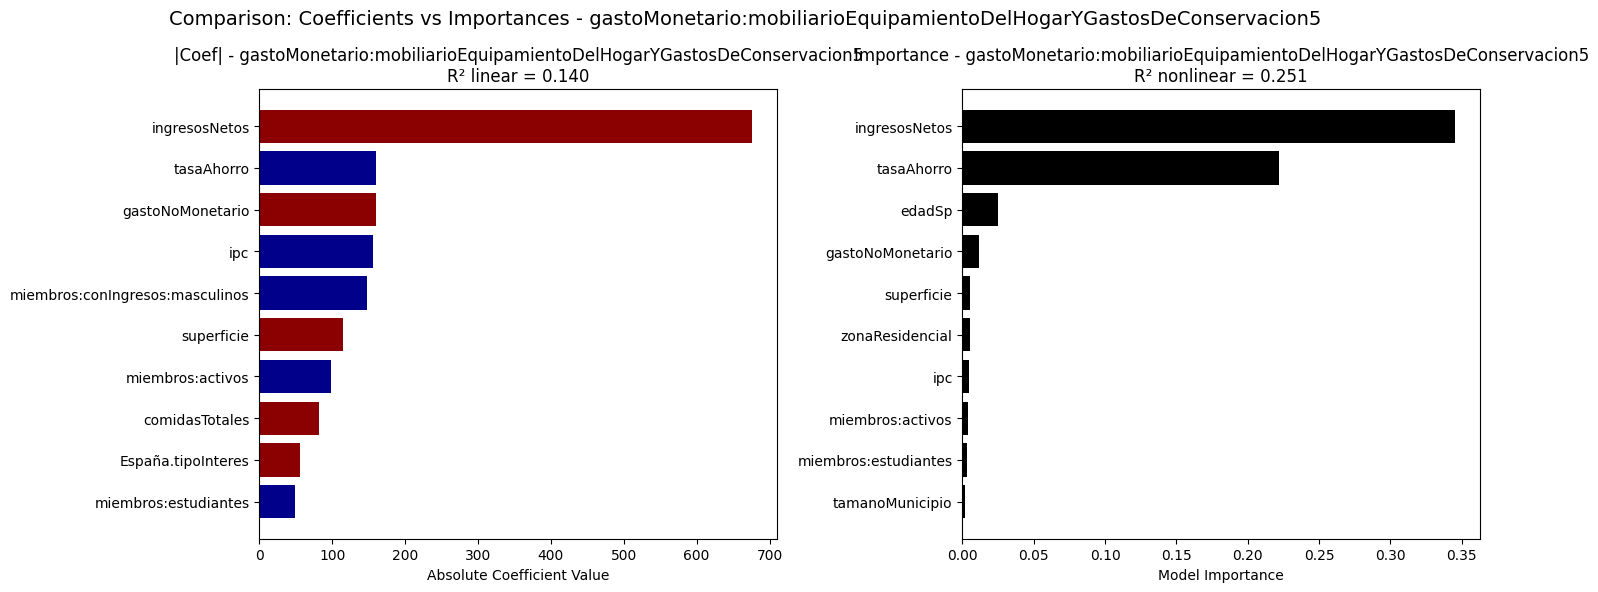

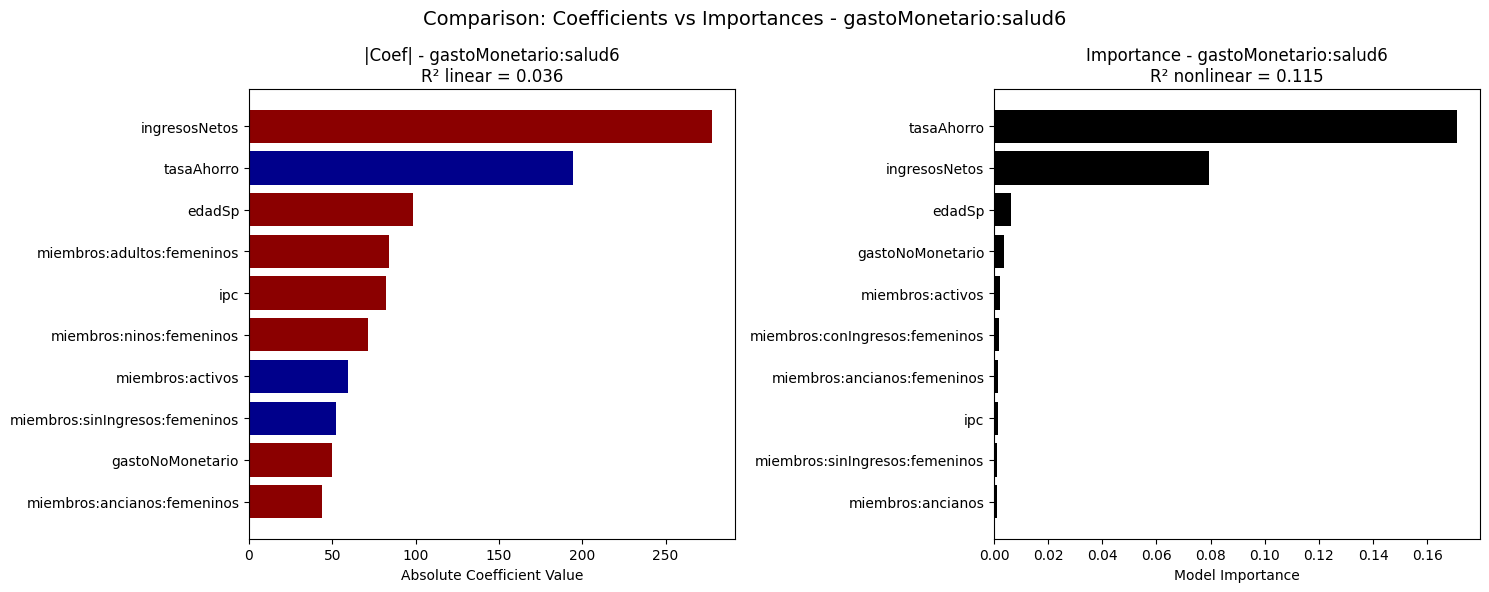

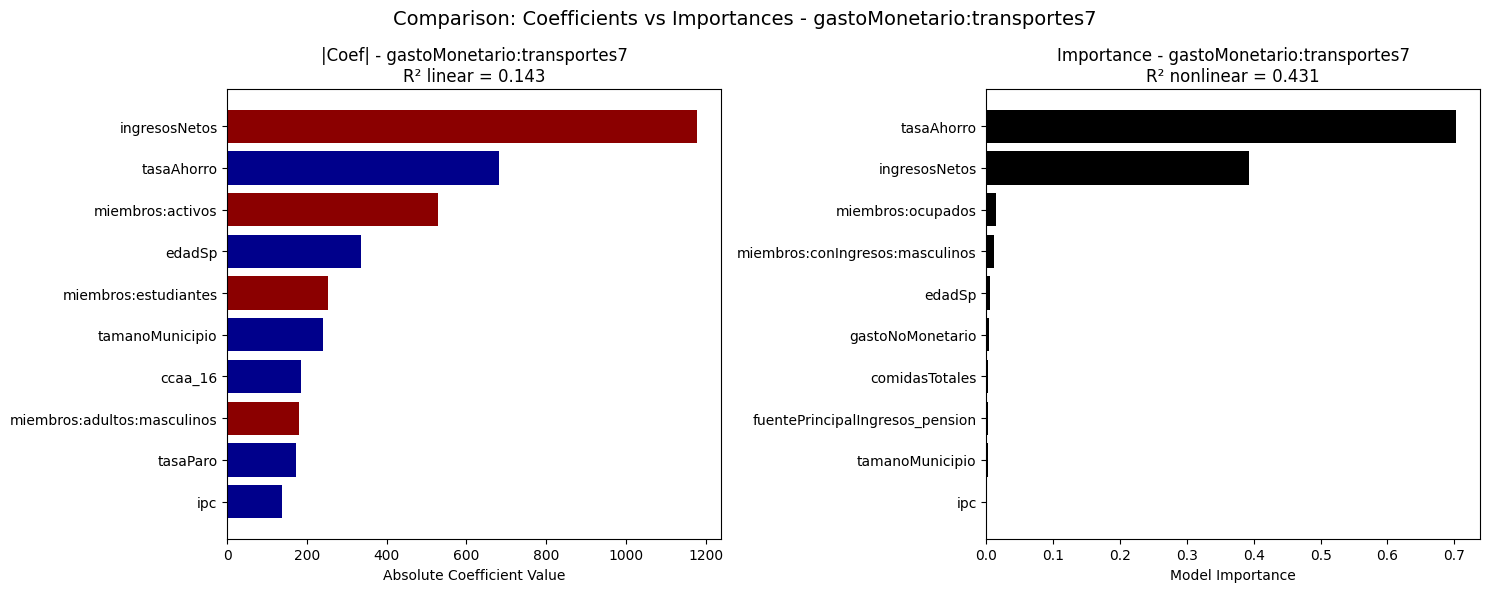

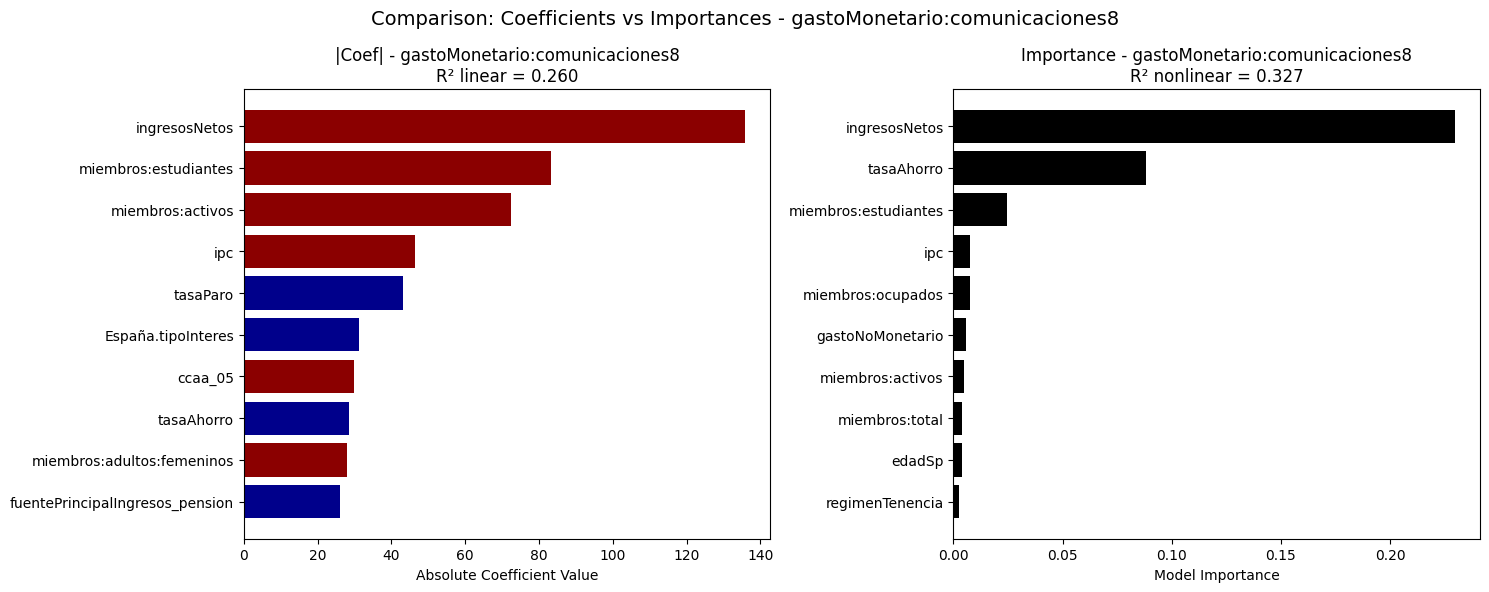

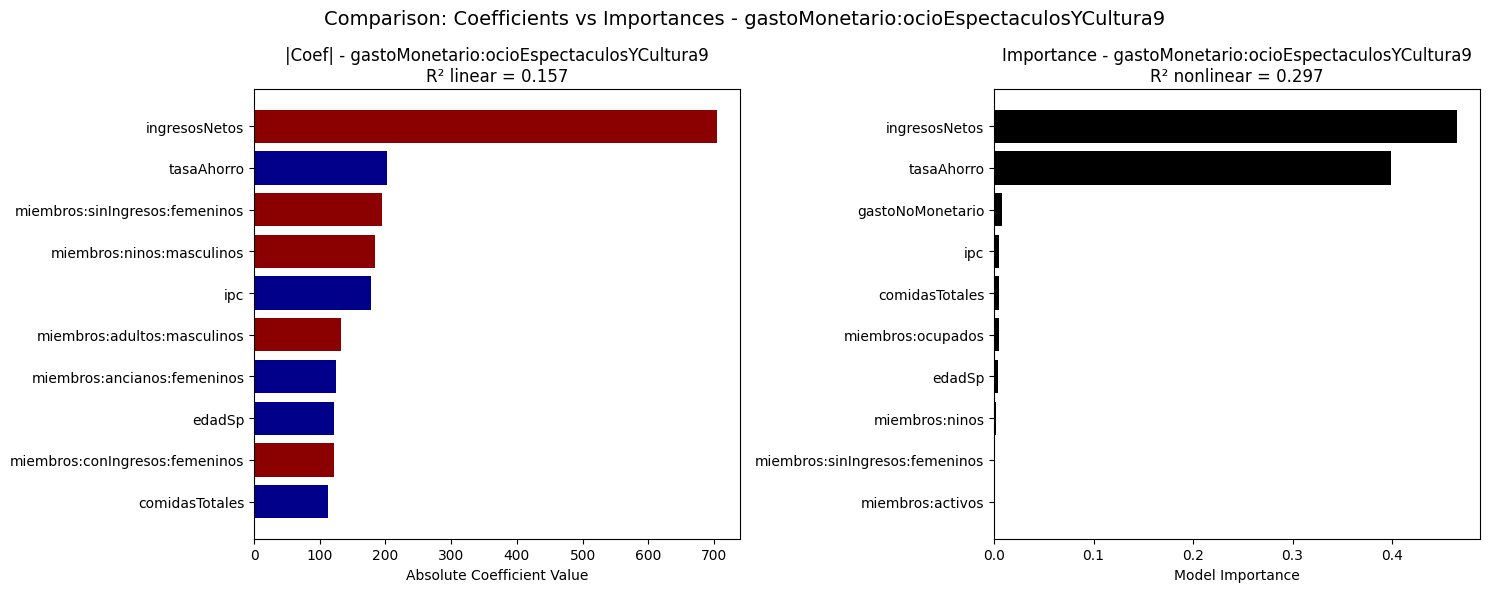

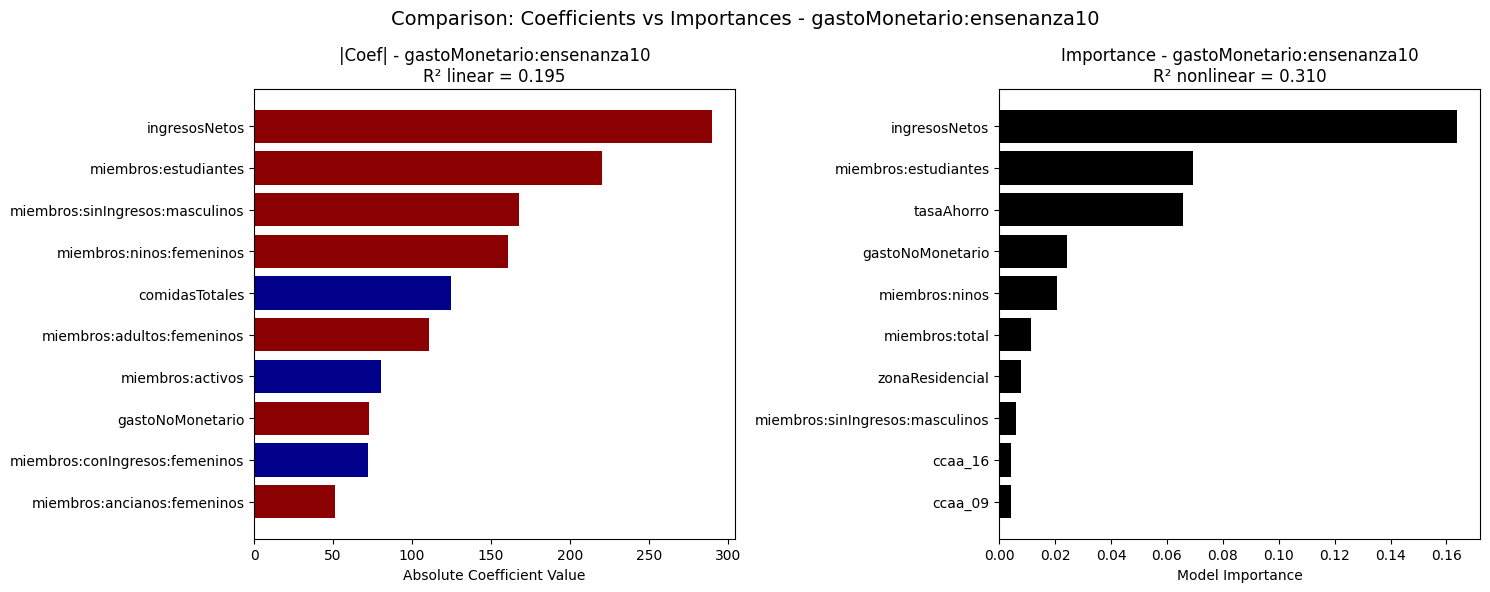

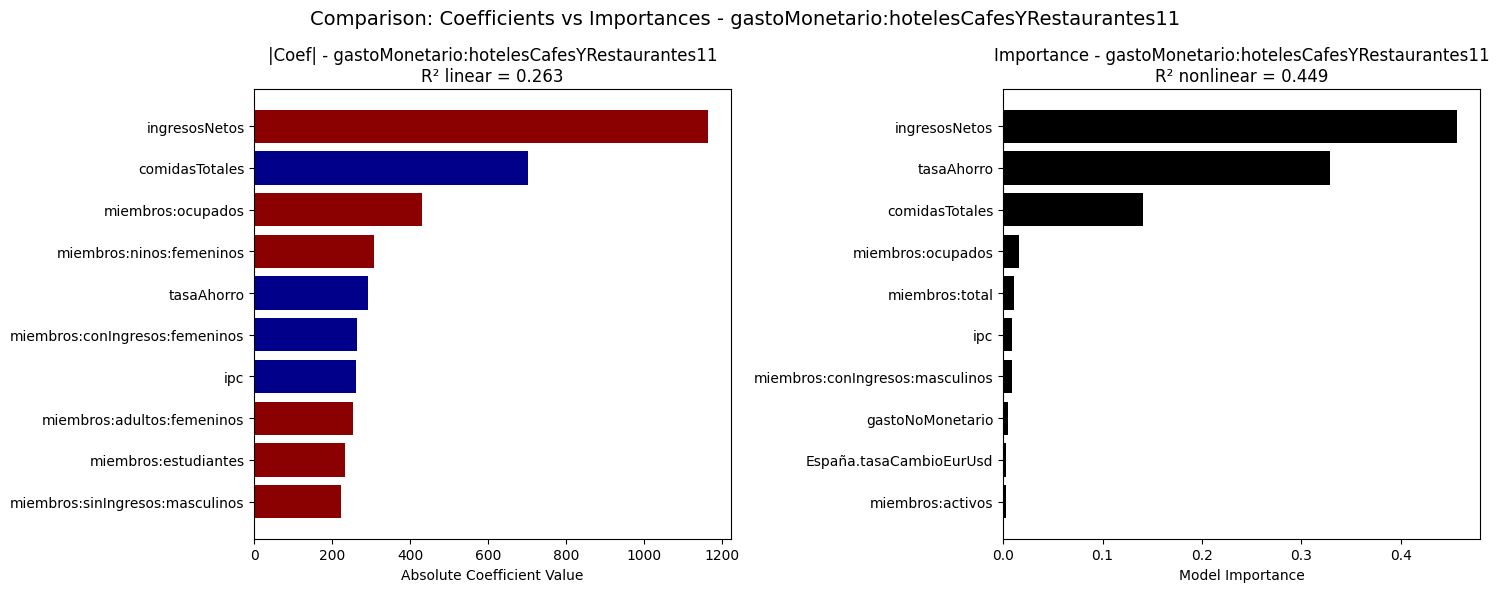

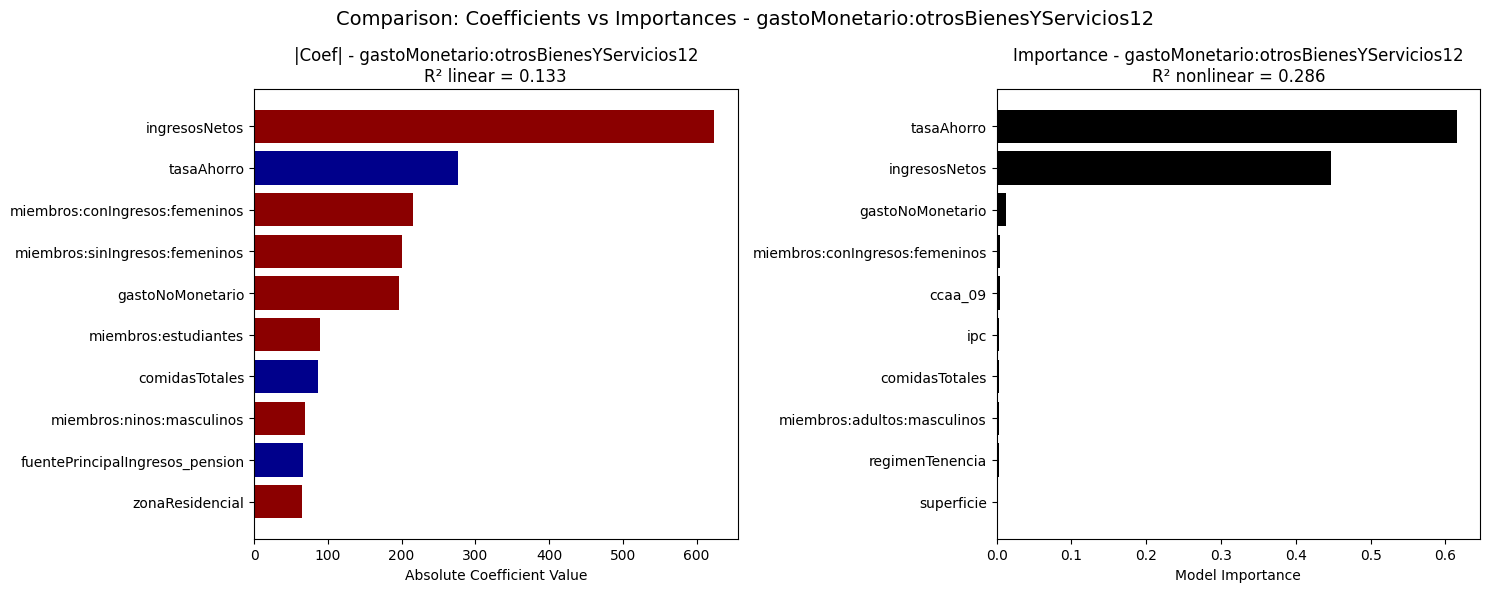

In [5]:
compare_coefficients_and_importances_with_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)

### Tabla comparativa de la métrica R2

In [6]:
metrics_lineal_df

,Gasto,R2,R2 Ajustado,AIC,BIC,N,MSE
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.294151,0.294077,6.664890e+06,6.665312e+06,365318,4.906088e+06
1,gastoMonetario:hotelesCafesYRestaurantes11,0.262737,0.262663,6.827890e+06,6.828301e+06,365318,7.665038e+06
2,gastoMonetario:comunicaciones8,0.260183,0.260104,5.536819e+06,5.537252e+06,365318,2.237013e+05
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.245915,0.245832,6.585330e+06,6.585774e+06,365318,3.945927e+06
4,gastoMonetario:ensenanza10,0.195102,0.195022,6.112667e+06,6.113067e+06,365318,1.082058e+06
5,gastoMonetario:ocioEspectaculosYCultura9,0.156679,0.156585,6.656912e+06,6.657366e+06,365318,4.800029e+06
6,gastoMonetario:transportes7,0.143106,0.143024,7.236214e+06,7.236603e+06,365318,2.343898e+07
7,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.139831,0.139746,6.558023e+06,6.558423e+06,365318,3.661803e+06
8,gastoMonetario:ropaYCalzado3,0.136202,0.136114,6.563778e+06,6.564189e+06,365318,3.719929e+06
9,gastoMonetario:otrosBienesYServicios12,0.132796,0.132716,6.721883e+06,6.722261e+06,365318,5.734536e+06


In [7]:
metrics_nonlineal_df

,Target,R2
0,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.489901
1,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.451945
2,gastoMonetario:hotelesCafesYRestaurantes11,0.448961
3,gastoMonetario:transportes7,0.430620
4,gastoMonetario:comunicaciones8,0.327452
5,gastoMonetario:ensenanza10,0.310310
6,gastoMonetario:ocioEspectaculosYCultura9,0.296604
7,gastoMonetario:otrosBienesYServicios12,0.285666
8,gastoMonetario:ropaYCalzado3,0.265287
9,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.250673


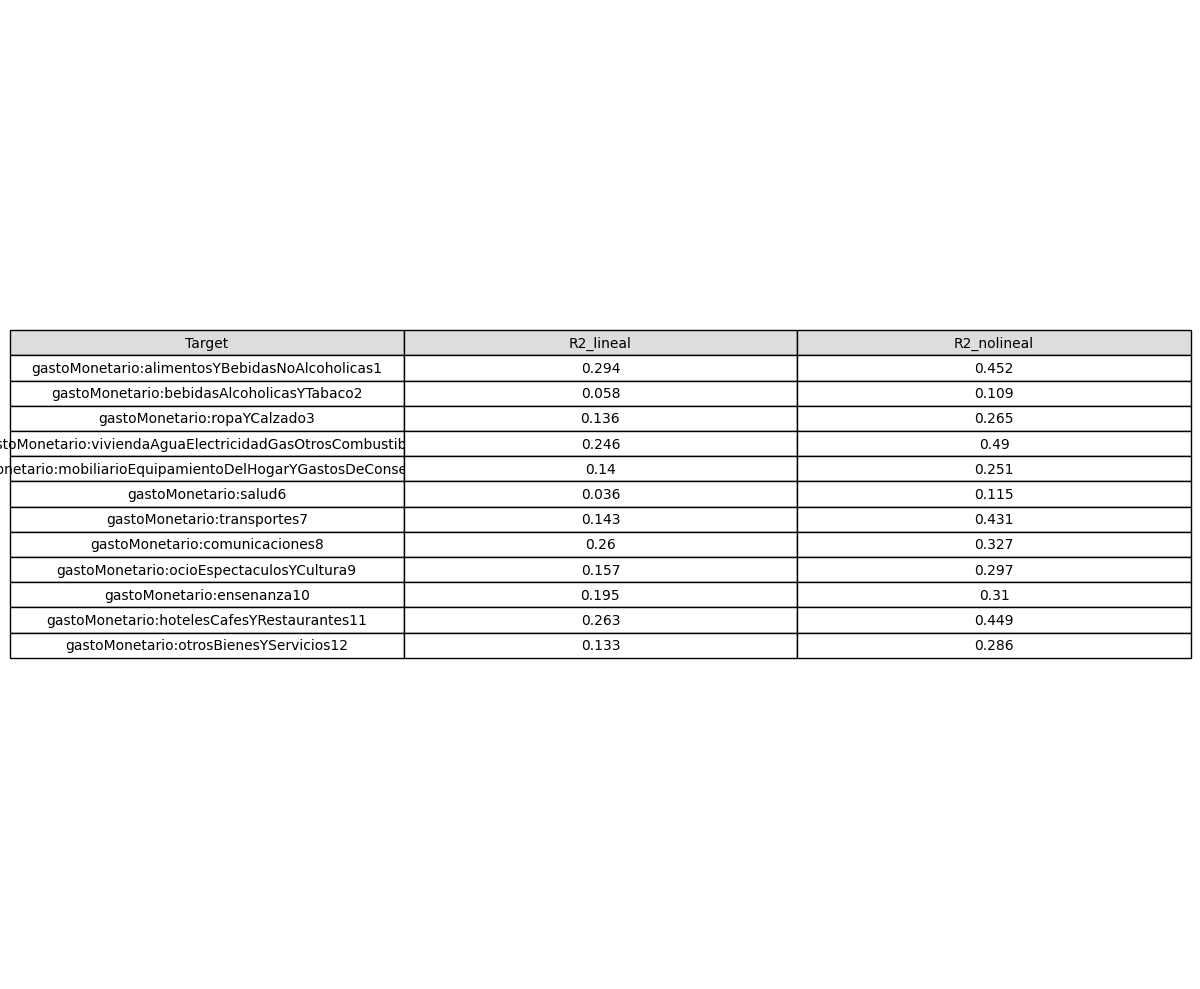

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df):
    # Fusionar ambos DataFrames por la columna correspondiente
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Extraer código numérico del Target
    merged['Codigo'] = merged['Target'].str.extract(r'(\d+)').astype(int)
    
    # Ordenar por el código
    merged.sort_values(by="Codigo", inplace=True)

    # Eliminar columna auxiliar si no la quieres mostrar
    top = merged.drop(columns="Codigo")

    # Crear tabla visual
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    tabla = ax.table(
        cellText=top.round(3).values,
        colLabels=top.columns,
        loc='center',
        cellLoc='center',
        colColours=["#dddddd"] * 3
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df)

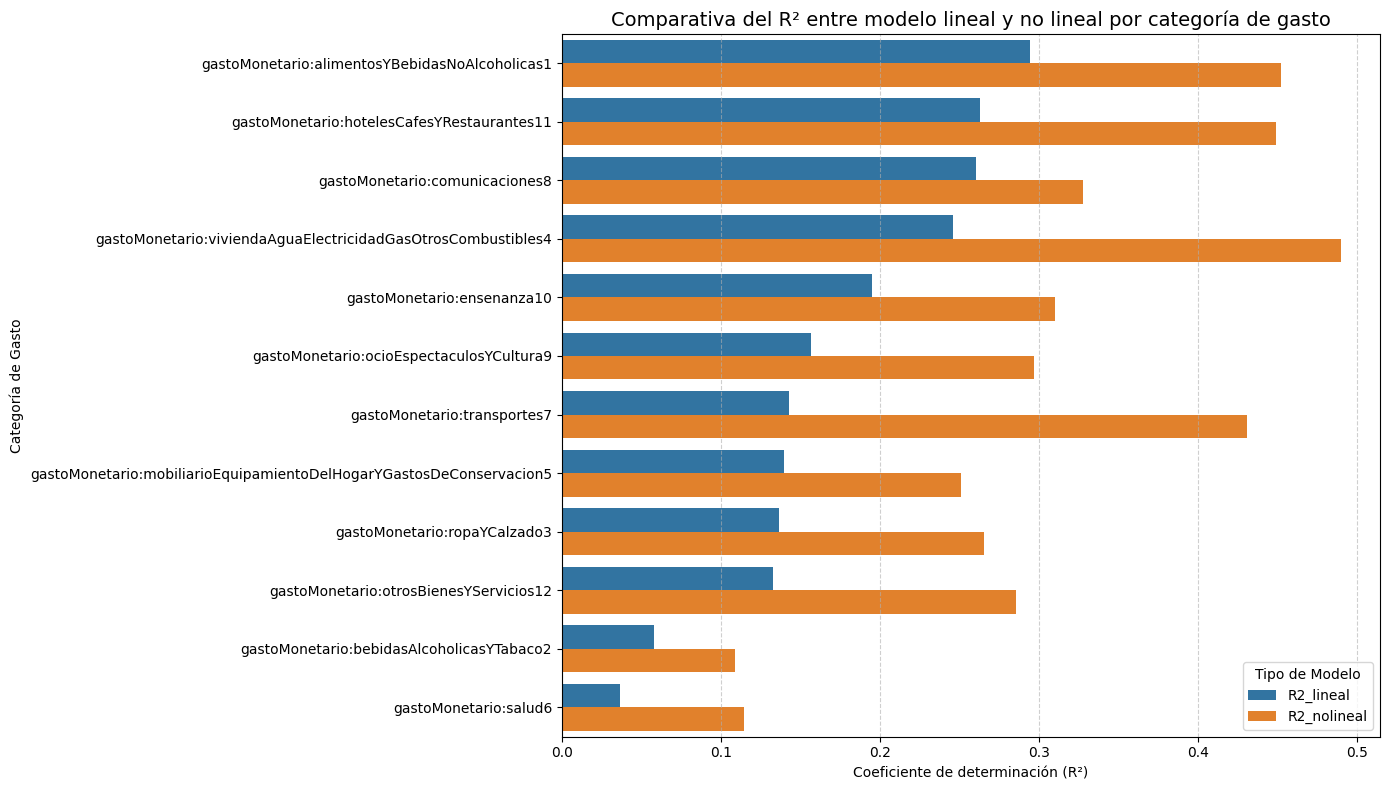

In [9]:
import seaborn as sns

def plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df, top_n=45):
    # Renombrar y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar por R² lineal
    merged.sort_values(by="R2_lineal", ascending=False, inplace=True)
    top = merged.head(top_n)

    # Convertir a formato largo para seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["R2_lineal", "R2_nolineal"],
                     var_name="Modelo", value_name="R²")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted, x="R²", y="Target", hue="Modelo")
    plt.title("Comparativa del R² entre modelo lineal y no lineal por categoría de gasto", fontsize=14)
    plt.xlabel("Coeficiente de determinación (R²)")
    plt.ylabel("Categoría de Gasto")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.legend(title="Tipo de Modelo")
    plt.tight_layout()
    plt.show()

plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df)

# Comparativa mse

In [14]:

mse_no_lineal_df = pd.read_csv(
    '../../datamarts/mse_por_categoria_no_lineal_supercategory.tsv',
    sep='\t',
    encoding='utf-8'
)

mse_no_lineal_df.rename(columns={'MSE': 'MSE_no_lineal'}, inplace=True)

In [15]:
mse_lineal_df = metrics_lineal_df.rename(columns={"Gasto": "Target", "MSE": "MSE_lineal"})

mse_lineal_df = mse_lineal_df[['Target', 'MSE_lineal']]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_mse_comparison(metrics_lineal_df, mse_no_lineal_df, top_n=30):
    # Renombrar columnas y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "MSE": "MSE_lineal"})
    df_nolineal = mse_no_lineal_df.rename(columns={"MSE_no_lineal": "MSE_nolineal"})

    merged = pd.merge(df_lineal[["Target", "MSE_lineal"]], df_nolineal, on="Target")

    merged["Target"] = merged["Target"].str.replace("gastoMonetario:", "", regex=False)


    # Ordenar y seleccionar top
    merged.sort_values(by="MSE_lineal", ascending=True, inplace=True)
    top = merged.head(top_n)

    # Preparar formato largo para Seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["MSE_lineal", "MSE_nolineal"],
                     var_name="Modelo", value_name="MSE")

    # Estilo gráfico
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data=melted, x="MSE", y="Target", hue="Modelo", palette="pastel", edgecolor=".2")

    # Mejoras visuales
    plt.title("Comparativa del MSE entre modelos lineal y no lineal", fontsize=16)
    plt.xlabel("Error cuadrático medio (MSE)", fontsize=12)
    plt.ylabel("Categoría de Gasto", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Modelo", loc="upper right")
    plt.tight_layout()

    plt.show()


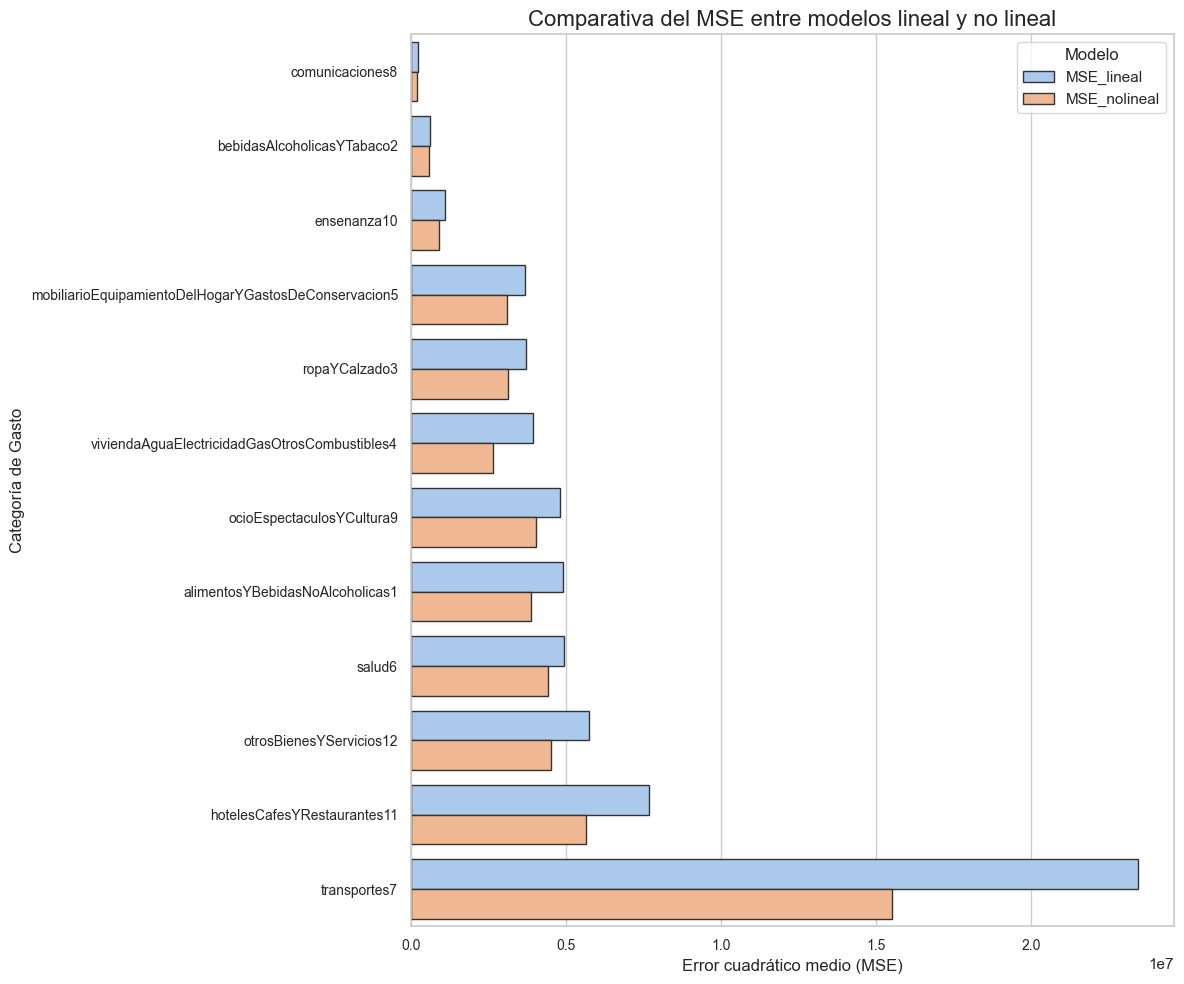

In [17]:
plot_mse_comparison(metrics_lineal_df, mse_no_lineal_df)